In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import nibabel as nb
import SUITPy as suit
import matplotlib.pyplot as plt
import seaborn as sb
import Functional_Fusion.atlas_map as am
from Functional_Fusion.dataset import *
import Functional_Fusion.matrix as matrix
import pickle
import sys
sys.path.append("..")
from generativeMRF.evaluation import align_models
from ProbabilisticParcellation.util import *
import ProbabilisticParcellation.parcel_hierarchy as ph
from Functional_Fusion.dataset import * 
import matplotlib.pyplot as plt

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

## HCP = 0, HCP = 0.3, ... HCP = 1

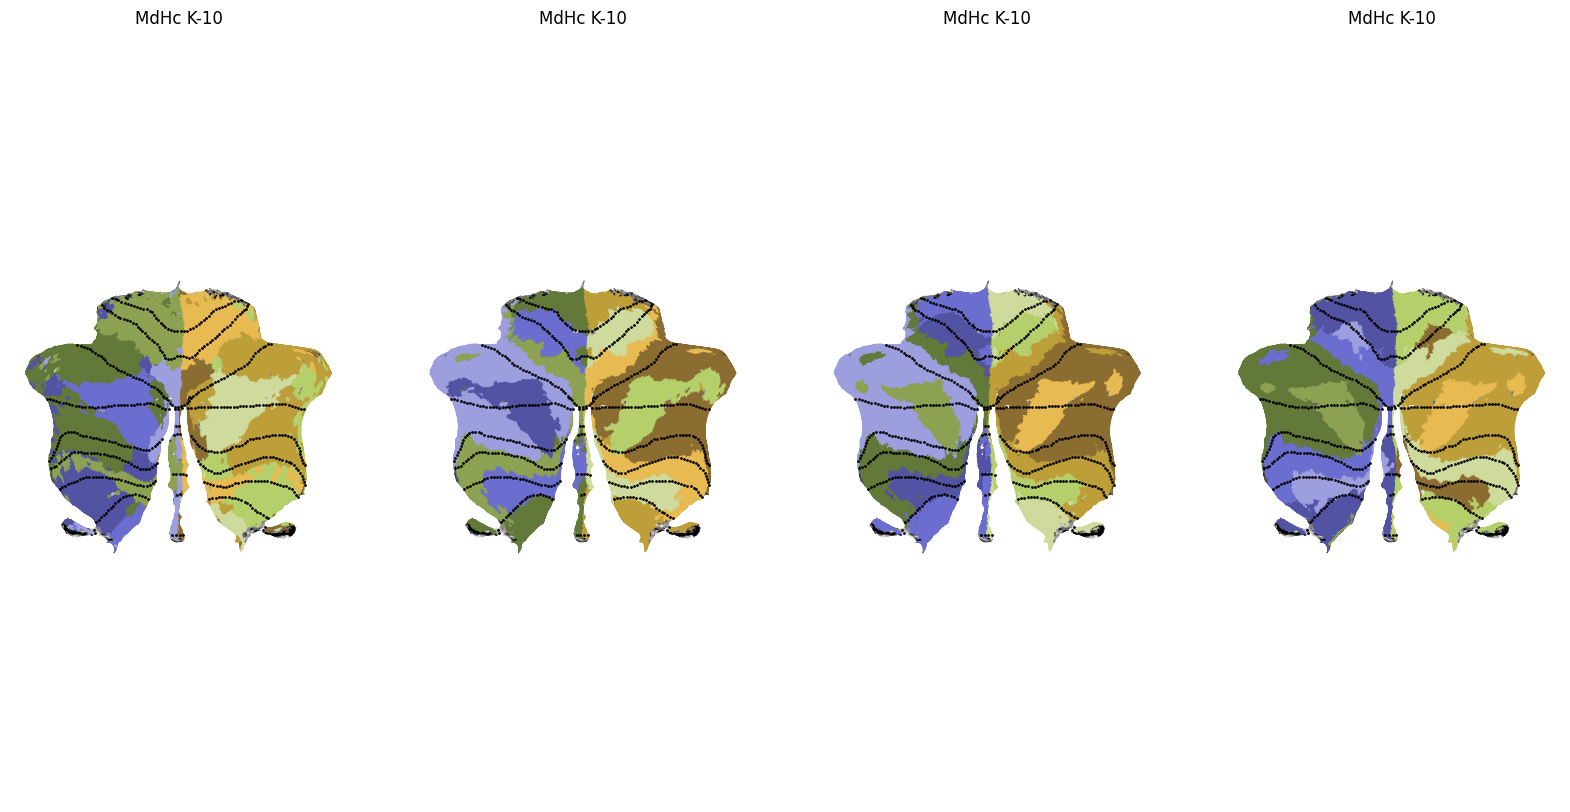

In [3]:
model_name = ['Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-0',
                  'Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-0.3',
                  'Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-0.5',
                  'Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-1']
fig = plt.figure(figsize=(20,10))
plot_model_parcel(model_name,[1,4])

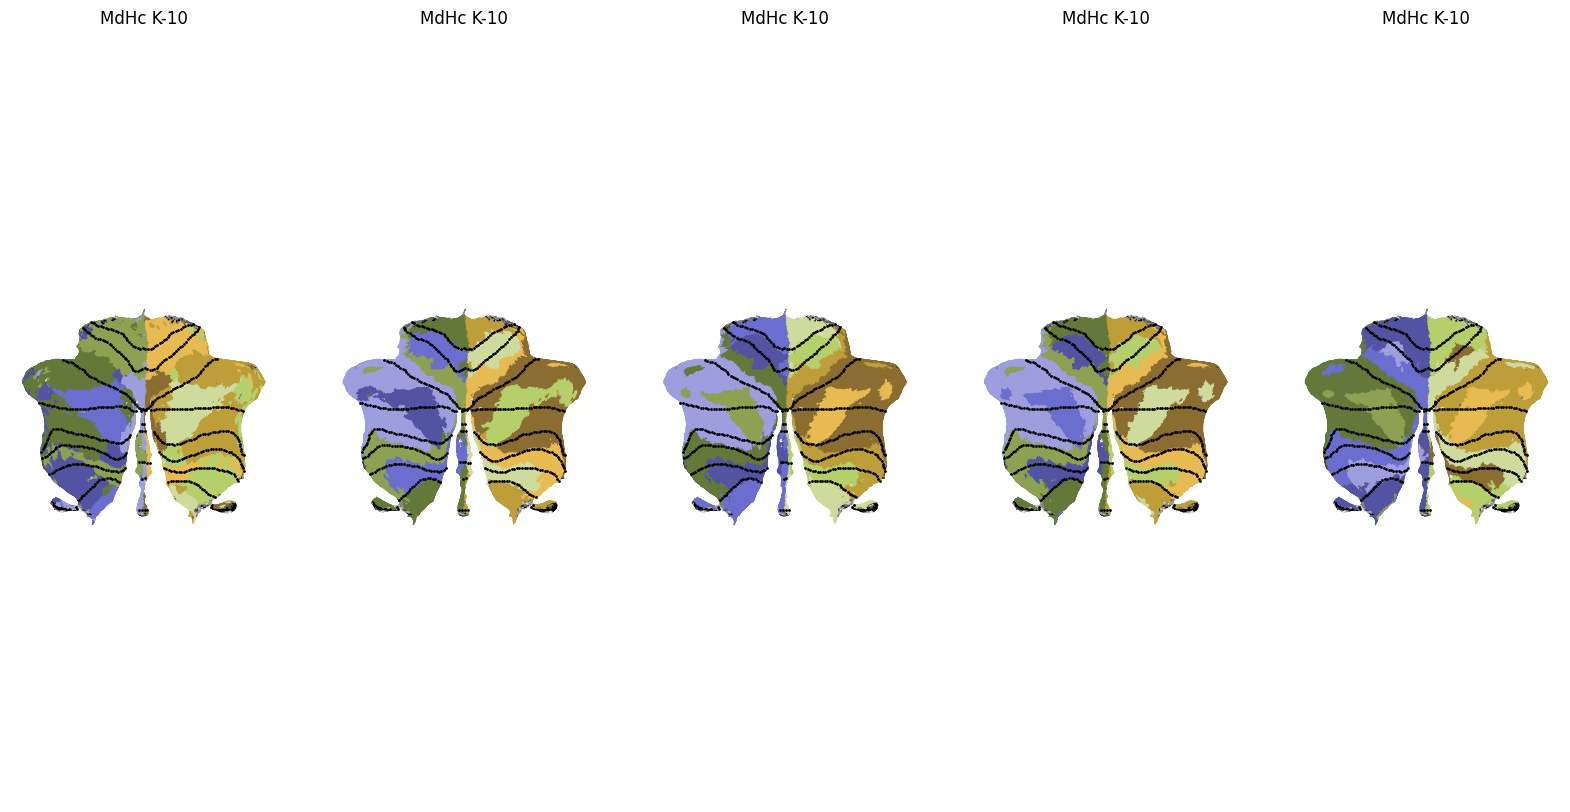

In [16]:
model_name = ['Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-0',
                  'Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-0.3',
                  'Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-0.5',
                  'Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-0.7',
                  'Models_01/HCP_weighting/sym_MdHc_space-MNISymC3_K-10_HCP-1']
fig = plt.figure(figsize=(20,10))
plot_model_parcel(model_name,[1,5])

In [4]:
models = []
for mn in model_name:
    info, model = load_batch_best(mn)
    models.append(model)



In [5]:
Prop = align_models(models,inplace=True)
parcel = Prop.argmax(axis=0)+1
atlas = model_name[0].split('space-')[1].split('_')[0]


In [14]:

# Get colour map
w_cos_sim,_,_ = ph.parcel_similarity(models[0],plot=True)
cmap = ph.colormap_mds(w_cos_sim,plot='3d',type='rgb')


ValueError: could not broadcast input array from shape (5,5) into shape (10,10)

In [15]:

plot_multi_flat(models,atlas,grid=[1,4],
                cmap=None,
                titles=model_name) 

# ax = plot_multi_flat(parcel,atlas,cmap = cmap,
#                     dtype='label',
#                     labels=labels,
#                     render='plotly')


AttributeError: 'list' object has no attribute 'shape'